In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
df1 = pd.read_csv("mobile price.csv")
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [30]:
df1.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [31]:
df1.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [32]:
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [33]:
Target=df1['price_range'].value_counts()/len(df1)
print(Target)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64


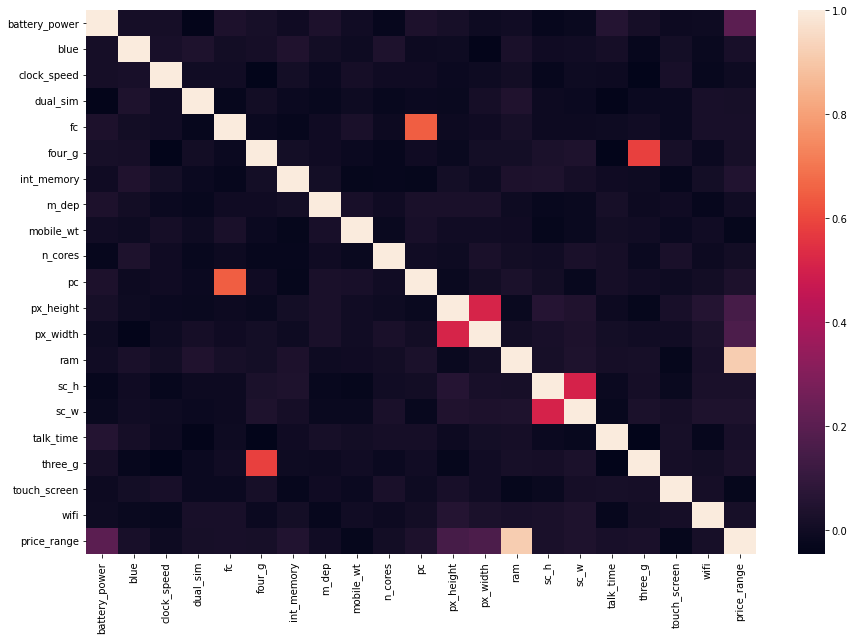

In [34]:
plt.figure(figsize = (15, 10))
sns.heatmap(df1.corr())
plt.show()

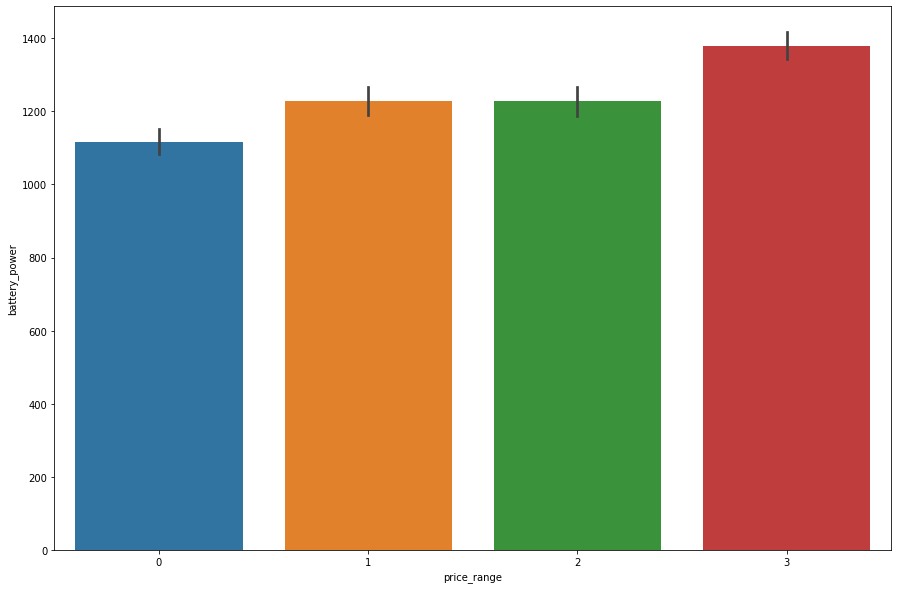

In [35]:
import seaborn as sns
plt.figure(figsize = (15, 10))
sns.barplot(x = "price_range", y = "battery_power", data = df1)
plt.show()

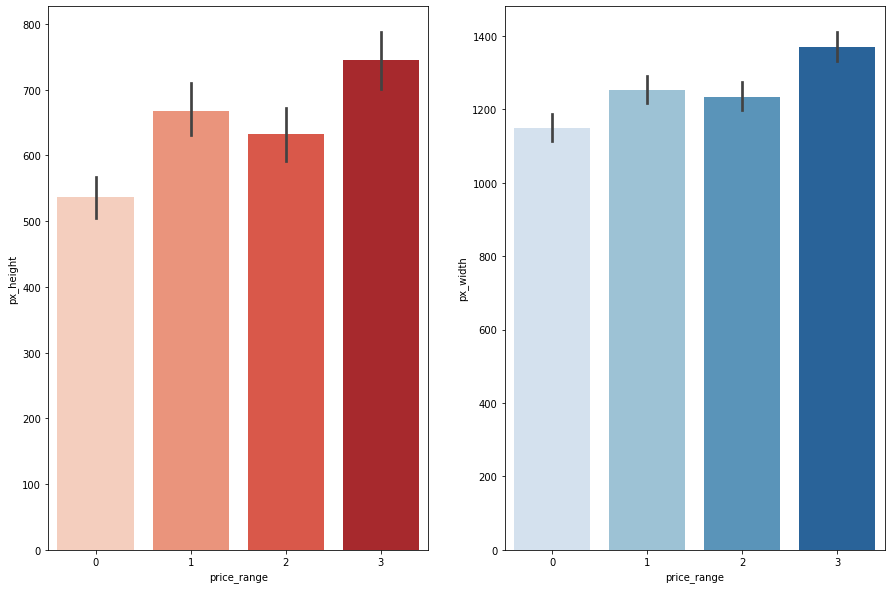

In [36]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)
sns.barplot(x = "price_range", y = "px_height", data = df1, palette = "Reds")
plt.subplot(1, 2, 2)
sns.barplot(x = "price_range", y = "px_width", data = df1, palette = "Blues")
plt.show()

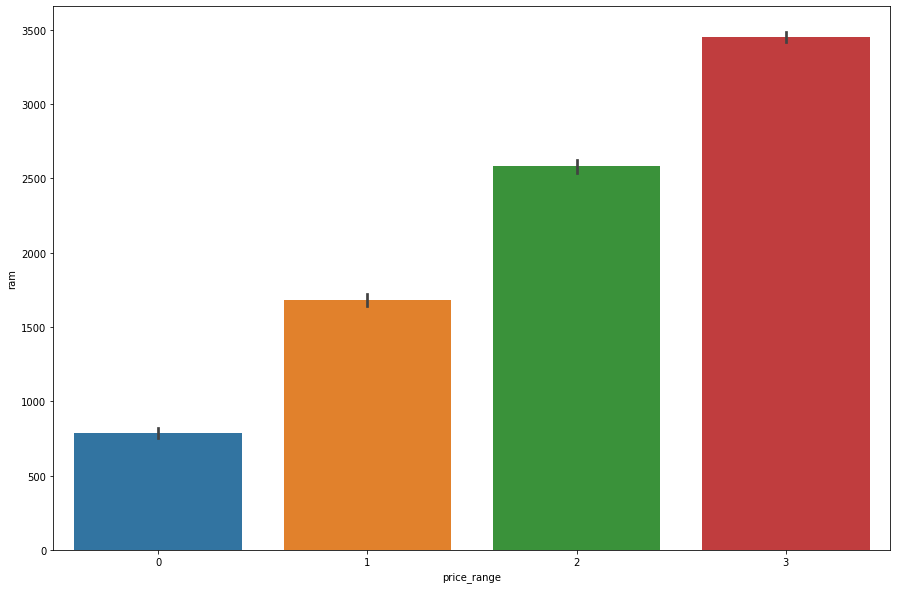

In [37]:
plt.figure(figsize = (15, 10))
sns.barplot(x = "price_range", y = "ram", data = df1)
plt.show()

C:\Users\DEVI LAKSHMI\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEVI LAKSHMI\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


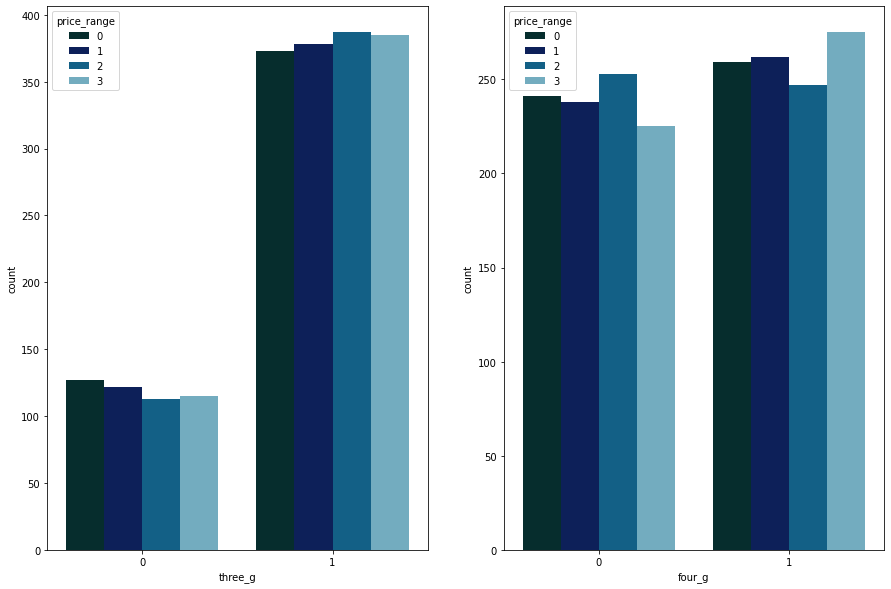

In [38]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)
sns.countplot(df1["three_g"], hue = df1["price_range"], palette ="ocean")
plt.subplot(1, 2, 2)
sns.countplot(df1["four_g"], hue = df1["price_range"], palette ="ocean")
plt.show()

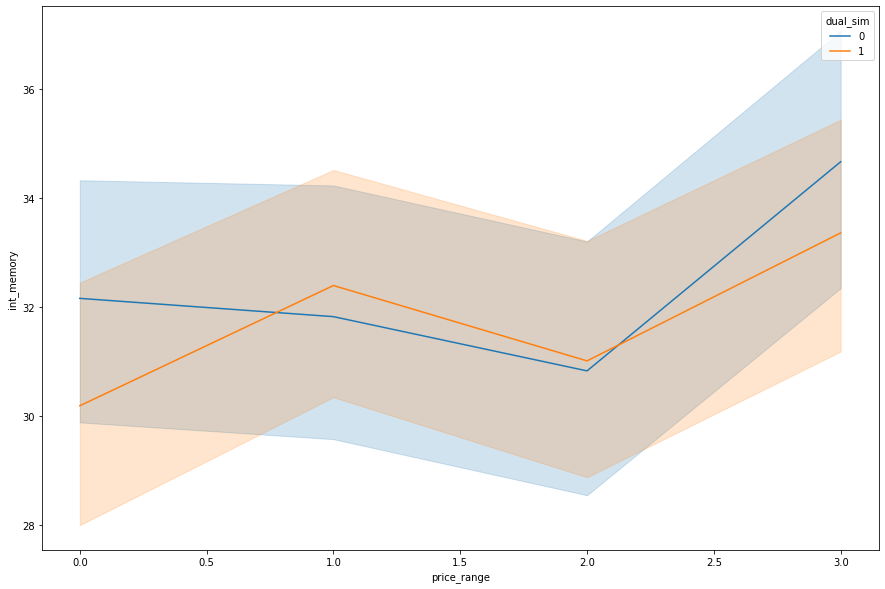

In [39]:
plt.figure(figsize = (15, 10))
sns.lineplot(x ="price_range", y = "int_memory", data = df1, hue = "dual_sim")
plt.show()

In [72]:
Xs = df1[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']]
Ys = df1["price_range"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, Ys ,test_size = 0.2, shuffle=False)
Xs

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [73]:
Ys

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [65]:
x = df1.drop(["price_range"], axis = 1)
y = df1["price_range"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [55]:
forest =  RandomForestClassifier()
forest.fit(X_train, y_train)
y_predict =forest.predict(X_test)
accuracy_score(y_test, y_predict)
print("ACCURACY OF THE MODEL",accuracy_score(y_test, y_predict))
print("before smot accuracy is",accuracy_score(y_test, y_predict))

ACCURACY OF THE MODEL 0.8675
before smot accuracy is 0.8675


In [56]:
randfor =  RandomForestClassifier()
randfor.fit(X_train, y_train)
y_predict =randfor.predict(X_test)
accuracy_score(y_test, y_predict)
print("After smot accuracy is",accuracy_score(y_test, y_predict))

After smot accuracy is 0.8775


In [57]:
gaussian_nb=GaussianNB()
gaussian_nb.fit(X_train,y_train)

GaussianNB()

In [58]:
bernoulli_nb=BernoulliNB()
bernoulli_nb.fit(X_train,y_train)

BernoulliNB()

In [59]:
pred=gaussian_nb.predict(X_test)
acc_gnb=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_gnb)

Accuracy Score:  0.835


In [60]:
pred=bernoulli_nb.predict(X_test)
acc_bnb=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_bnb)

Accuracy Score:  0.255


<BarContainer object of 2 artists>

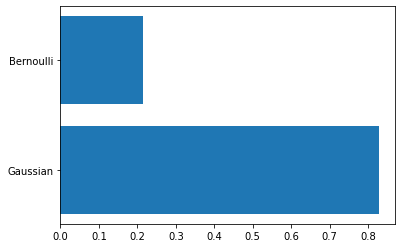

In [53]:
plt.barh(['Gaussian','Bernoulli'],[acc_gnb,acc_bnb])